# Zero Fitting Ansatz

Here I will desribe an alternetive Ansatz which is restricted to give zero wieght to the states which are not actually part of the system.

For the Hamiltonian I have been working with, the last two entries are extra.

In [1]:
from qiskit.opflow import (I, X, Y, Z)
from qiskit.opflow.primitive_ops import MatrixOp
from qiskit import quantum_info as qi
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
import numpy as np

Since this Ansatz is case dependent, I will write it for the specific case I have been studying and not worry about a generalized version.  The idea is to apply a controled-Ry gate so that if the last qubit is on then the second qubit is off.  

In [2]:
def Ui(cir_i,phi_i):  
    
    for q in range(0,Q):
        cir_i.ry(phi_i[q],q)
    cir_i.cx(2,1)
    cir_i.ry(phi_i[1],1)
    cir_i.cx(2,1)
    cir_i.cx(1,0)
    
    return cir_i

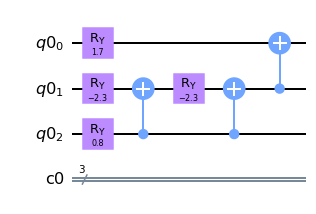

In [5]:
Q=3
qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir_i = QuantumCircuit(qr , cr)
tst = Ui(cir_i,[1.7,-2.3,0.8])

tst.draw(output = 'mpl')

In [6]:
qi.Statevector.from_instruction(tst)

Statevector([-4.05019021e-01+0.j, -4.61046401e-01+0.j, -5.16009421e-01+0.j,
             -4.53302813e-01+0.j,  2.57009543e-01+0.j,  2.92562370e-01+0.j,
             -1.45440722e-18+0.j, -1.04686435e-18+0.j],
            dims=(2, 2, 2))


Notice that the last two entries are zero no matter what the parameter values happen to be.

Now we need to create the off diagonal version of the Ansatz.  To do this we need to add controlled-Ry gates after each regular Ry gate which flips $\phi_a$ to $\phi_b$ based on the occupation of an extra qubit.

In [7]:
def Ui_off(cir_i,phi_a, phi_b):  
    
    for q in range(0,Q):
        cir_i.ry(phi_a[q],q)
        cir_i.cx(Q,q)
        cir_i.ry(-(phi_b[q]-phi_a[q])/2,q)
        cir_i.cx(Q,q)
        cir_i.ry((phi_b[q]-phi_a[q])/2,q)
    cir_i.cx(2,1)
    cir_i.ry(phi_a[1],1)
    cir_i.cx(Q,1)
    cir_i.ry(-(phi_b[1]-phi_a[1])/2,1)
    cir_i.cx(Q,1)
    cir_i.ry((phi_b[1]-phi_a[1])/2,1)
    cir_i.cx(2,1)
    cir_i.cx(1,0)
    
    return cir_i

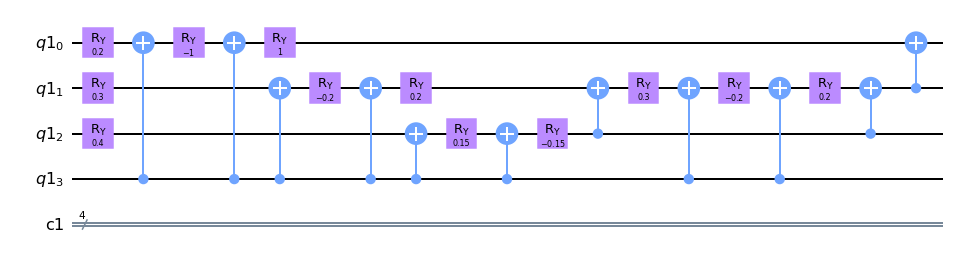

In [8]:
qr = QuantumRegister(Q+1)
cr = ClassicalRegister(Q+1)
cir_i = QuantumCircuit(qr , cr)
tst = Ui_off(cir_i,[0.2,0.3,0.4],[2.2,0.7,0.1])

tst.draw(output = 'mpl')

In [9]:
phi_a = [0.2,0.3,0.4]
phi_b = [2.2,0.7,0.1]

qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir_i = QuantumCircuit(qr , cr)
tst_a = Ui(cir_i,phi_a)

qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir_i = QuantumCircuit(qr , cr)
tst_b = Ui(cir_i,phi_b)

qr = QuantumRegister(Q+1)
cr = ClassicalRegister(Q+1)
cir_i = QuantumCircuit(qr , cr)
cir_i.h(Q)
tst_ab = Ui_off(cir_i,[0.2,0.3,0.4],[2.2,0.7,0.1])


In [10]:
psi_a = qi.Statevector.from_instruction(tst_a)
psi_b = qi.Statevector.from_instruction(tst_b)
psi_ab = qi.Statevector.from_instruction(tst_ab)

print(1/np.sqrt(2)*psi_a)
print(1/np.sqrt(2)*psi_b)
print(psi_ab)

Statevector([ 6.58751847e-01+0.j,  6.60956506e-02+0.j,  2.04457807e-02+0.j,
              2.03775826e-01+0.j,  1.39778614e-01+0.j,  1.40246414e-02+0.j,
             -1.64291053e-19+0.j,  1.51316259e-20+0.j],
            dims=(2, 2, 2))
Statevector([ 2.45009585e-01+0.j,  4.81384948e-01+0.j,  4.05464949e-01+0.j,
              2.06368727e-01+0.j,  1.60303634e-02+0.j,  3.14958113e-02+0.j,
             -1.53339781e-18+0.j,  7.26660298e-19+0.j],
            dims=(2, 2, 2))
Statevector([ 6.58751847e-01+0.j,  6.60956506e-02+0.j,  2.04457807e-02+0.j,
              2.03775826e-01+0.j,  1.39778614e-01+0.j,  1.40246414e-02+0.j,
             -1.72720547e-19+0.j,  3.27628044e-18+0.j,  2.45009585e-01+0.j,
              4.81384948e-01+0.j,  4.05464949e-01+0.j,  2.06368727e-01+0.j,
              1.60303634e-02+0.j,  3.14958113e-02+0.j,  6.31991825e-18+0.j,
             -4.64144274e-18+0.j],
            dims=(2, 2, 2, 2))


The property of having zero at the ends only holds for $T=1$.  Observe:

In [11]:
def U(cir,phi_b):
    T = len(phi_b)
    for t in range(T):
        cir = Ui(cir,phi_b[t])
    return cir

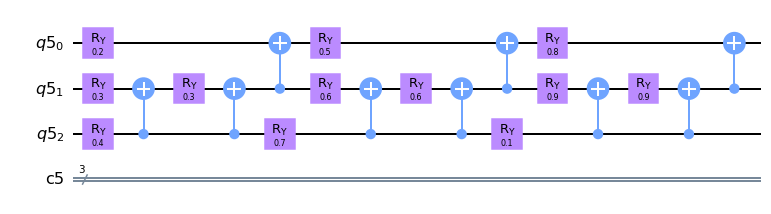

In [12]:
qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir = QuantumCircuit(qr , cr)
tst = U(cir,[[0.2,0.3,0.4],[0.5,0.6,0.7],[0.8,0.9,0.1]])

tst.draw(output = 'mpl')

In [13]:
qi.Statevector.from_instruction(tst)

Statevector([ 0.19398496+0.j, -0.20914968+0.j,  0.55892557+0.j,
              0.54949459+0.j,  0.39950061+0.j,  0.36188911+0.j,
              0.05018589+0.j,  0.1058351 +0.j],
            dims=(2, 2, 2))
